<a href="https://colab.research.google.com/github/hechen2020/19ma573HuixinChen/blob/master/src/hw_is_it_integral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Find $F_1$, the cdf of $p_1$

first, we determine the value of C, which satisfy

$$\int_0^1{\frac{1}{C}(2I_{(0,1/100]}(x)+1I_{(1/100,1)}(x))dx}=1$$

and $C=1.01$

thus we have the pdf
$$p_1(x)=\frac{1}{1.01}(2I_{(0,1/100]}(x)+1I_{(1/100,1)}(x))$$

so the cdf will be

$$F_1(x)=\int_0^x{\frac{1}{1.01}(2I_{(0,1/100]}(t)+1I_{(1/100,1)}(t))dt}$$

$$=\begin{cases}
      \frac{2x}{1.01}, & \text{if}\ x\in(0,0.01] \\
      \frac{0.02+x-0.01}{1.01}, & \text{if}\ x\in(0.01,1)
    \end{cases}$$
    
$$=\begin{cases}
      \frac{2x}{1.01}, & \text{if}\ x\in(0,0.01] \\
      \frac{0.01+x}{1.01}, & \text{if}\ x\in(0.01,1)
    \end{cases}$$

2. Find $F_1^{-1}$

from part 1, we have

$$F_1(x)=\begin{cases}
      \frac{2x}{1.01}, & \text{if}\ x\in(0,0.01] \\
      \frac{0.01+x}{1.01}, & \text{if}\ x\in(0.01,1)
    \end{cases}$$
    
so the inverse of $F_1$ is

$$F_1^{-1}(y)=\begin{cases}
      \frac{1.01y}{2}, & \text{if}\ y\in(0,\frac{0.02}{1.01}] \\
      1.01y-0.01, & \text{if}\ y\in(\frac{0.02}{1.01},1)
    \end{cases}$$

3. Implement Pseudocode

In [0]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import array

In [0]:
#define function h(x)
def h(x):
  if x>0 and x<=0.01:
    return 100
  elif x>0.01 and x<1:
    return 1

In [0]:
#define pdf p1
def p1(x):
  if x>0 and x<=0.01:
    return 2/1.01
  elif x>0.01 and x<1:
    return 1/1.01

In [0]:
#define inverse of cdf
def invF(y):
  if y>0 and y<=(0.02/1.01):
    return 1.01*y/2
  elif y>(0.02/1.01) and y<1:
    return 1.01*y-0.01

In [0]:
def inv_trans_samp(n):
  arr = array.array('f',[])
  
  for i in range(0,n):
    Y = np.random.uniform(low=0,high=1)
    X = invF(Y)
    arr.append(X)
    
  return arr

4. Implement Pseudocode
importance sampling integral(n):

taking the average of h(x)/p1(x)



In [0]:
def imp_samp_int(n):
  arr = array.array('f',[])
  
  for i in range(0,n):
    Z = np.random.uniform(low=0,high=1)
    X = invF(Z)#X as iid p1 samples
    Y = p1(X)
    H = h(X)
    arr.append(H/Y)
    
  return np.mean(arr)

In [0]:
def imp_samp(n, m):
  arr = array.array('f',[])
  
  for i in range(m):
    a = imp_samp_int(n)
    arr.append(a)
    
  return arr

5. Demonstrate convergense rate

In [0]:
def rmse(arr):
  arr_sqerr = array.array('f',[])
  for i in range(len(arr)):
    sq_err = (arr[i]-1.99)**2# for each element in arr_mc, return the sqr of error
    arr_sqerr.append(sq_err)
  return np.sqrt(np.mean(arr_sqerr))# return the sqrt of the mean of all error

array('i', [5, 6, 7, 8, 9, 10])
array('f', [1.1924585103988647, 0.8126934766769409, 0.6918162107467651, 0.49890682101249695, 0.29361361265182495, 0.23320743441581726])


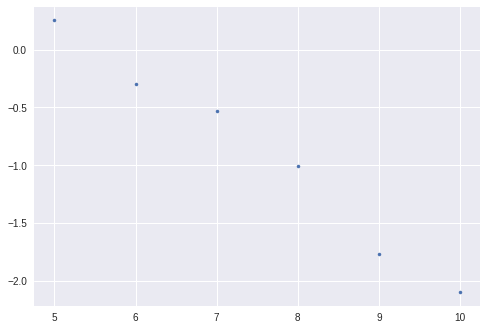

In [212]:
a1 = imp_samp(2**5,100)
s1 = np.std(a1)
a2 = imp_samp(2**6,100)
s2 = np.std(a2)
a3 = imp_samp(2**7,100)
s3 = np.std(a3)
a4 = imp_samp(2**8,100)
s4 = np.std(a4)
a5 = imp_samp(2**9,100)
s5 = np.std(a5)
a6 = imp_samp(2**10,100)
s6 = np.std(a6)

arrlogN = array.array('i', [5, 6, 7, 8, 9, 10])
print(arrlogN)
arr_rmse = array.array('f', [rmse(a1),
                            rmse(a2),
                            rmse(a3),
                            rmse(a4),
                            rmse(a5),
                            rmse(a6)])
print(arr_rmse)
plt.plot(arrlogN,np.log2(arr_rmse),'.')

In [213]:
out = ss.linregress(arrlogN,np.log2(arr_rmse))
print('----->>>the convergence rate is ' + str(-out[0]))

----->>>the convergence rate is 0.4756932258605957


6. finding a better p2 than p1:

$$p_2=\frac{1}{C}h$$

where $C$ can be calculated as $1.99$, so

$$p_2(x)=\frac{1}{1.99}(100I_{(0,1/100]}(x)+1I_{(1/100,1)}(x))$$

with cdf

$$F_2(x)=\int_0^x{\frac{1}{1.99}(100I_{(0,1/100]}(t)+1I_{(1/100,1)}(t))dt}$$

$$=\begin{cases}
      \frac{100x}{1.99}, & \text{if}\ x\in(0,0.01] \\
      \frac{0.99+x}{1.99}, & \text{if}\ x\in(0.01,1)
    \end{cases}$$
    
and inverse of cdf

$$F_2^{-1}(y)=\begin{cases}
      \frac{1.99y}{100}, & \text{if}\ y\in(0,\frac{1}{1.99}] \\
      1.99y-0.99, & \text{if}\ y\in(\frac{1}{1.99},1)
    \end{cases}$$

In [0]:
#define pdf p2
def p2(x):
  if x>0 and x<=0.01:
    return 100/1.99
  elif x>0.01 and x<1:
    return 1/1.99

In [0]:
#define inverse of cdf of p2
def invF_p2(y):
  if y>0 and y<=(1/1.99):
    return 1.99*y/100
  elif y>(1/1.99) and y<1:
    return 1.99*y-0.99

In [0]:
def imp_samp_int_p2(n):
  arr = array.array('f',[])
  
  for i in range(0,n):
    Z = np.random.uniform(low=0,high=1)
    X = invF_p2(Z)#X as iid p2 samples
    Y = p2(X)
    H = h(X)
    arr.append(H/Y)
    
  return np.mean(arr)

In [0]:
def imp_samp_p2(n, m):
  arr = array.array('f',[])
  
  for i in range(m):
    a = imp_samp_int_p2(n)
    arr.append(a)
    
  return arr

array('i', [5, 6, 7, 8, 9, 10])
array('f', [9.53674206272126e-09, 1.0967254837623841e-07, 1.0967254837623841e-07, 1.0967254837623841e-07, 1.0967254837623841e-07, 1.0967254837623841e-07])


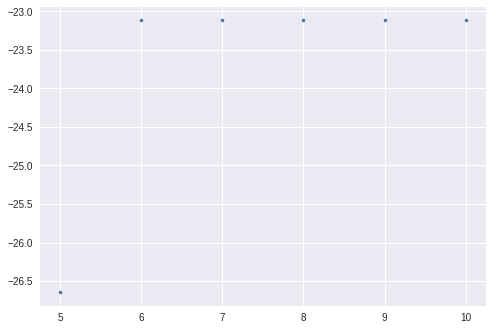

In [218]:
a1 = imp_samp_p2(2**5,100)
s1 = np.std(a1)
a2 = imp_samp_p2(2**6,100)
s2 = np.std(a2)
a3 = imp_samp_p2(2**7,100)
s3 = np.std(a3)
a4 = imp_samp_p2(2**8,100)
s4 = np.std(a4)
a5 = imp_samp_p2(2**9,100)
s5 = np.std(a5)
a6 = imp_samp_p2(2**10,100)
s6 = np.std(a6)

arrlogN = array.array('i', [5, 6, 7, 8, 9, 10])
arr_err = array.array('f', [s1,s2,s3,s4,s5,s6])
print(arrlogN)
arr_rmse = array.array('f', [rmse(a1),
                            rmse(a2),
                            rmse(a3),
                            rmse(a4),
                            rmse(a5),
                            rmse(a6)])
print(arr_rmse)
plt.plot(arrlogN,np.log2(arr_rmse),'.')

In [219]:
out = ss.linregress(arrlogN,np.log2(arr_rmse))
print('----->>>???the convergence rate is ' + str(-out[0]))

----->>>???the convergence rate is -0.5033659253801619
